In [1]:
#Importation des librairies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import scipy.stats as st
import math as math
import statsmodels.api as sm

In [2]:
data = pd.read_csv('vgsales.csv')

In [3]:
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [4]:
#Verification si les variables sont importés dans le bon types
data.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [5]:
#Recherche des valeurs manquantes
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
#Suppression des entrées avec la variable "Year" manquantes
data = data.loc[data['Year'].notnull(),:]

#Transforme le dtype de 'Year' en nombre entier
data = data.astype({'Year':'int'})

In [7]:
#Remplace les modalités manquantes de la variable "Publisher" par 'Unknown'
data.loc[data['Publisher'].isnull(), 'Publisher'] = 'Unknown'

In [8]:
#Recherche des doublons
data.loc[data[['Name', 'Platform', 'Year', 'Global_Sales']].duplicated(keep=False),:]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


In [9]:
data["Year"].value_counts()

2009    1431
2008    1428
2010    1259
2007    1202
2011    1139
2006    1008
2005     941
2002     829
2003     775
2004     763
2012     657
2015     614
2014     582
2013     546
2001     482
1998     379
2000     349
2016     344
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
2017       3
2020       1
Name: Year, dtype: int64

In [10]:
#Suppression des 3 entrées post 2016
data = data.loc[data['Year'] != 2017]
data = data.loc[data['Year'] != 2020]

In [11]:
#Tableau des moyennes, du mode et de la mediane, de la variance empirique, de l'écart type empirique,
#et de l'écart moyen absolu pour chaque zone géographique

Region = ('NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales')
tabSales = pd.DataFrame(index= ['Moyenne', 'Mode', 'Mediane', 'Variance', 'Ecart Type Empirique', 'Ecart Moyen Absolu'])
for reg in Region:
    tabSales[reg] = (data[reg].mean(), data[reg].mode()[0], data[reg].median(), data[reg].var(ddof=0), data[reg].std(), data[reg].mad())
    
tabSales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Moyenne,0.265463,0.147591,0.078677,0.048336,0.540343
Mode,0.000000,0.000000,0.000000,0.000000,0.020000
Mediane,0.080000,0.020000,0.000000,0.010000,0.170000
Variance,0.675123,0.258885,0.097084,0.036063,2.451913
Ecart Type Empirique,0.821684,0.508823,0.311593,0.189907,1.565906
Ecart Moyen Absolu,0.309473,0.191265,0.116708,0.061721,0.594528


In [12]:
#Tableau des 3 premiers quartiles + le 99ème centile

quartiles = pd.DataFrame()
for reg in Region:
    quartiles[reg] = data[reg].quantile([0.25,0.5,0.75, 0.99])
    
quartiles

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0.25,0.0000,0.00,0.00,0.00,0.0600
0.50,0.0800,0.02,0.00,0.01,0.1700
0.75,0.2400,0.11,0.04,0.04,0.4800
0.99,2.8156,1.94,1.27,0.65,5.4678


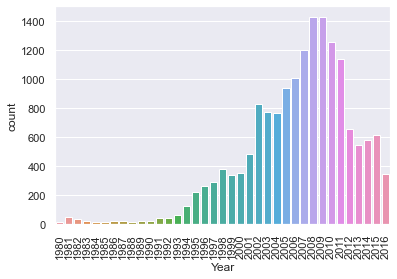

In [13]:
#Evolution du nombre de jeux, vendu à plus de 10.000 exemplaire entre 1980 et 2016
sns.set_theme()
sns.countplot(x=data["Year"])
plt.xticks(rotation=90)
plt.show()

In [14]:
#Calcul du nombre optimal de classe via la règle de Sturge
k = (math.log(16323,2))
k = round(k)

In [15]:
def salesByRegionGraph (region):
    
    #Agrégation de la variable 'Region' et création de l'histogramme
    sns.histplot(data=data, x=region, bins=k).set(xlabel = region + ' (en millions)')
    plt.show()

    #Filtre sur les jeux qui on fait moins de 1,5 millions de vente 
    sns.histplot(data=data, x=data[data[region]< 1.5][region], bins=k).set(xlabel = region + ' (en millions)')
    plt.show()

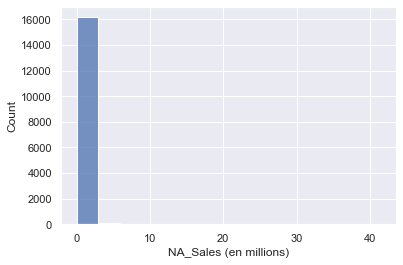

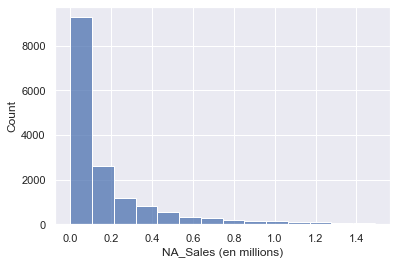

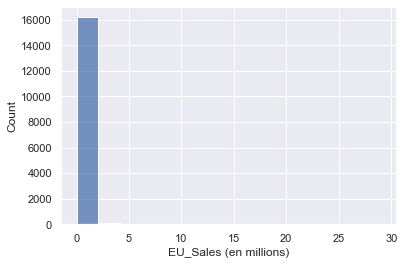

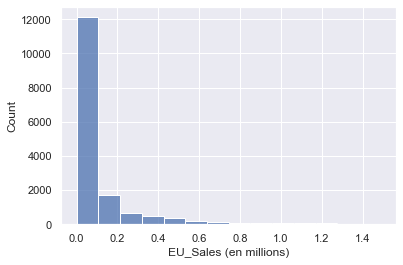

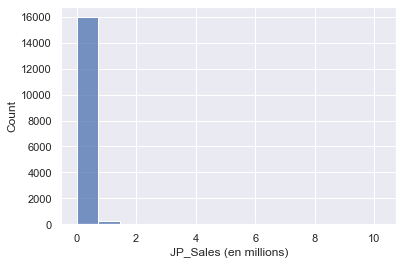

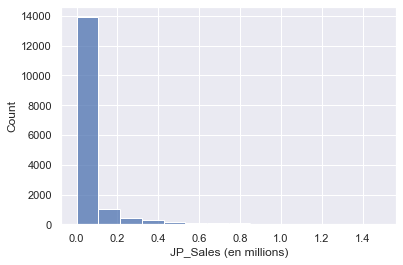

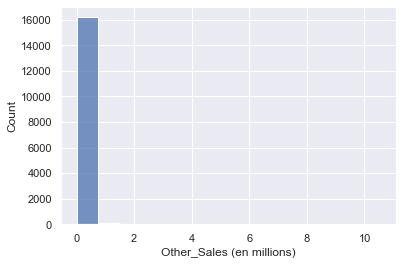

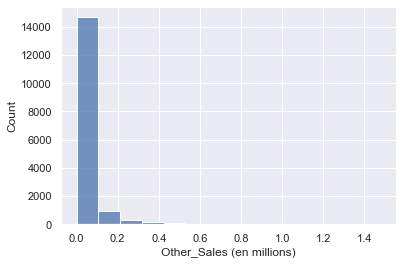

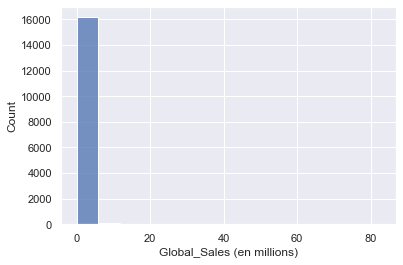

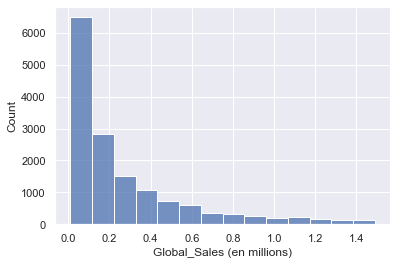

In [16]:
salesByRegionGraph("NA_Sales")
salesByRegionGraph("EU_Sales")
salesByRegionGraph("JP_Sales")
salesByRegionGraph("Other_Sales")
salesByRegionGraph("Global_Sales")

In [17]:
#Liste des differentes plateformes
platform =data['Platform'].unique()
display(platform)
print("Il y a", len(platform) ,"platformes différente")

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Il y a 31 platformes différente


   Platform  Effectif  Pourcentage
0        DS      2132    13.061325
1       PS2      2127    13.030693
2       PS3      1304     7.988728
3       Wii      1290     7.902959
4      X360      1235     7.566011
5       PSP      1197     7.333211
6        PS      1189     7.284200
7        PC       943     5.777124
8       GBA       811     4.968449
9        XB       803     4.919439
10       GC       542     3.320468
11      3DS       500     3.063162
12      PSV       410     2.511793
13      PS4       335     2.052319
14      N64       316     1.935919
15     SNES       239     1.464192
16     XOne       213     1.304907
17      SAT       173     1.059854
18     WiiU       143     0.876064
19     2600       116     0.710654
20      NES        98     0.600380
21       GB        97     0.594254
22       DC        52     0.318569
23      GEN        27     0.165411
24       NG        12     0.073516
25      SCD         6     0.036758
26       WS         6     0.036758
27      3DO         

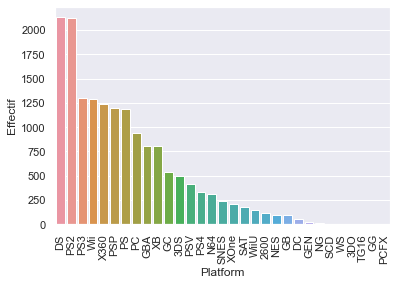

In [18]:
#Tableau des effectifs de la modalité "Platform" ainsi que de leurs pourcentage
effectifs = data["Platform"].value_counts()
modalites = effectifs.index

tabPlatform = pd.DataFrame(modalites, columns = ["Platform"]) # création du tableau à partir des modalités
tabPlatform["Effectif"] = effectifs.values
tabPlatform["Pourcentage"] = (tabPlatform["Effectif"] / len(data))*100
print(tabPlatform)

sns.barplot(data=tabPlatform, x="Platform", y='Effectif')
plt.xticks(rotation=90)
plt.show()

In [19]:
#Tableau des effectifs de la modalité "Name" ainsi que de leurs pourcentage
effectifs = data["Name"].value_counts()
modalites = effectifs.index
    
tabName = pd.DataFrame(modalites, columns = ["Name"]) # création du tableau à partir des modalités
tabName["Effectif"] = effectifs.values
tabName["Pourcentage"] = (tabName["Effectif"] / len(data))*100
tabName.head()

,Name,Effectif,Pourcentage
0,Need for Speed: Most Wanted,12,0.073516
1,FIFA 14,9,0.055137
2,Ratatouille,9,0.055137
3,LEGO Marvel Super Heroes,9,0.055137
4,Madden NFL 08,8,0.049011


           Genre  Effectif  Pourcentage
0         Action      3252    19.922808
1         Sports      2304    14.115052
2           Misc      1710    10.476015
3   Role-Playing      1469     8.999571
4        Shooter      1282     7.853948
5      Adventure      1276     7.817190
6         Racing      1226     7.510874
7       Platform       876     5.366661
8     Simulation       850     5.207376
9       Fighting       836     5.121608
10      Strategy       671     4.110764
11        Puzzle       571     3.498131


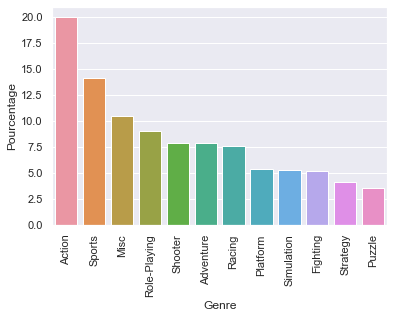

In [20]:
#Tableau des effectifs de la modalité "Genre" ainsi que de leurs pourcentage
effectifs = data["Genre"].value_counts()
modalites = effectifs.index
    
tabGenre = pd.DataFrame(modalites, columns = ["Genre"]) # création du tableau à partir des modalités
tabGenre["Effectif"] = effectifs.values
tabGenre["Pourcentage"] = (tabGenre["Effectif"] / len(data))*100
print(tabGenre)

sns.barplot(data=tabGenre, x="Genre", y='Pourcentage')
plt.xticks(rotation=90)
plt.show()

In [22]:
def topSalesGraph(var):
    #Créer un graph avec les 10 jeux les plus vendu de la region selectionné
    copy = data
    copy = copy.groupby('Name')[var].agg('sum').reset_index()
    copy.sort_values(by=var, ascending=False,  inplace = True)
    copy = copy[:10]
    sns.barplot(data=copy, x="Name", y=var).set(xlabel = 'Name', ylabel = var + ' (en million)')
    plt.xticks(rotation=90)
    sales = copy[var].tolist()
    for i in range(10):
        plt.text(i-0.25, sales[i]+1, round(sales[i], 1))
    plt.show()

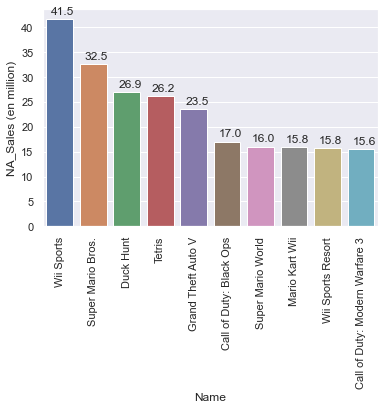

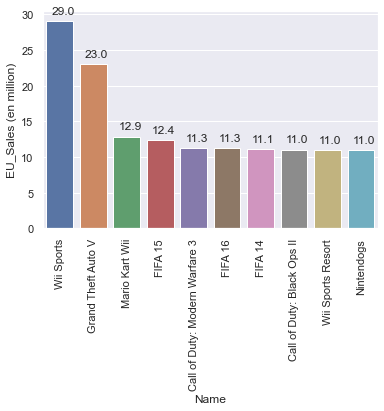

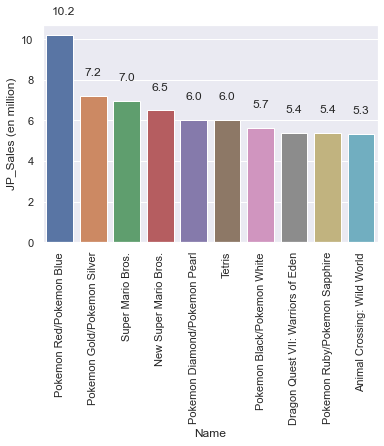

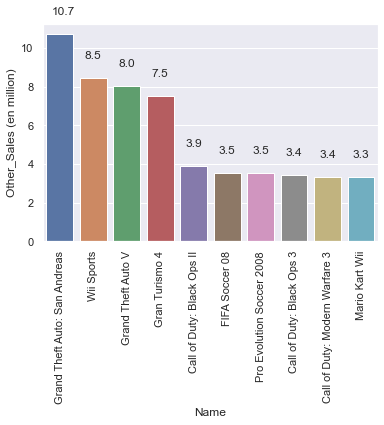

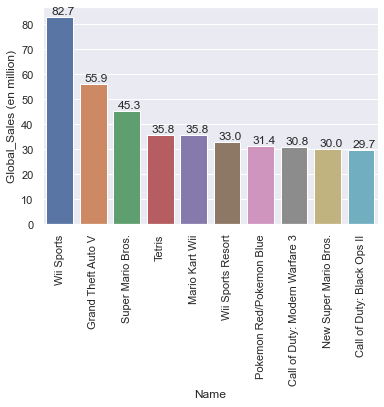

In [23]:
topSalesGraph('NA_Sales')
topSalesGraph('EU_Sales')
topSalesGraph('JP_Sales')
topSalesGraph('Other_Sales')
topSalesGraph('Global_Sales')

In [24]:
def platformSalesGraph (var):
    #Créer un graph avec le nombre de jeu vendu pour chaque console en fonction
    #de la region selectionné. Ainsi que d'un tableau
    copy = data
    copy = copy.groupby('Platform')[var].agg('sum').reset_index()
    sns.barplot(data=copy, x="Platform", y=var).set(xlabel = 'Platform', ylabel = var + ' par platform')
    plt.xticks(rotation=90)
    copy.sort_values(by=var, ascending=False,  inplace = True)
    display(copy.head(10))
    plt.show()

,Platform,NA_Sales
28,X360,594.33
16,PS2,572.92
26,Wii,497.37
17,PS3,388.90
4,DS,388.29
15,PS,334.71
6,GBA,184.12
29,XB,182.06
10,N64,138.91
7,GC,131.94


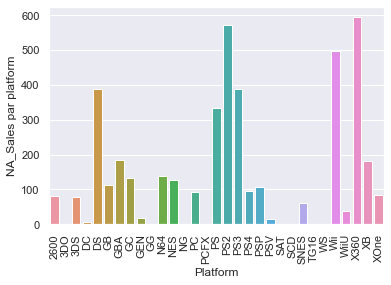

,Platform,EU_Sales
17,PS3,340.47
16,PS2,332.63
28,X360,278.01
26,Wii,264.35
15,PS,212.38
4,DS,194.07
13,PC,137.64
18,PS4,123.70
6,GBA,74.59
19,PSP,67.16


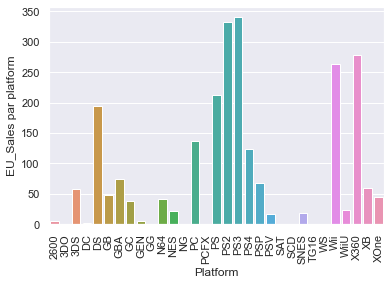

,Platform,JP_Sales
4,DS,175.02
15,PS,139.78
16,PS2,137.54
23,SNES,116.55
11,NES,98.65
2,3DS,97.30
5,GB,85.12
17,PS3,79.21
19,PSP,75.89
26,Wii,68.28


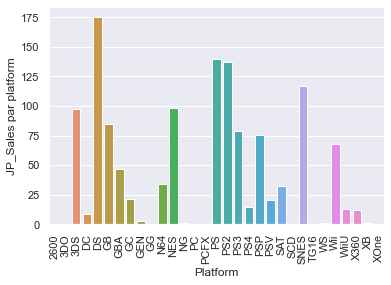

,Platform,Other_Sales
16,PS2,190.47
17,PS3,140.81
28,X360,84.67
26,Wii,79.20
4,DS,60.27
18,PS4,43.36
19,PSP,41.52
15,PS,40.69
13,PC,24.33
2,3DS,12.55


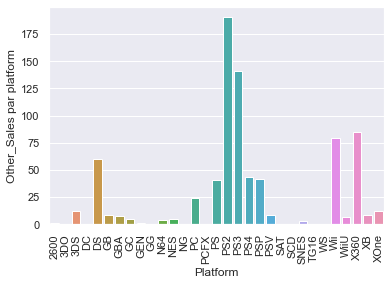

,Platform,Global_Sales
16,PS2,1233.46
28,X360,969.61
17,PS3,949.35
26,Wii,909.81
4,DS,818.67
15,PS,727.39
6,GBA,313.56
19,PSP,291.71
18,PS4,278.07
13,PC,255.05


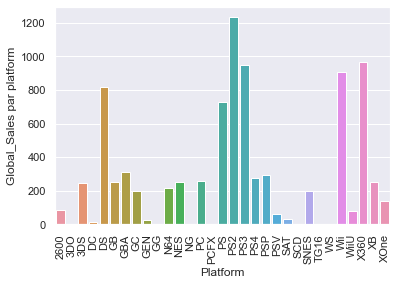

In [25]:
platformSalesGraph('NA_Sales')
platformSalesGraph('EU_Sales')
platformSalesGraph('JP_Sales')
platformSalesGraph('Other_Sales')
platformSalesGraph('Global_Sales')

In [26]:
def genreGraph (var):
    #Créer un graph avec le nombre de jeu vendu par genre et par région
    copy = data
    copy = copy.groupby('Genre')[var].agg('sum').reset_index()
    sns.barplot(data=copy, x="Genre", y=var).set(xlabel = 'Genre', ylabel = var + ' par genre')
    plt.xticks(rotation=90)
    sales = copy[var].tolist()
    for i in range(12):
        plt.text(i-0.3, sales[i]+25, round(sales[i]))
    plt.show()

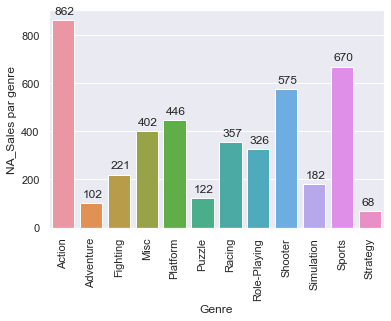

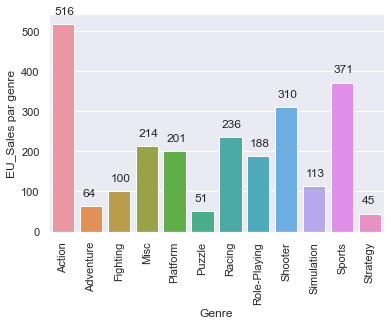

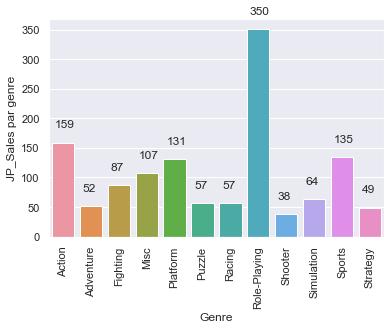

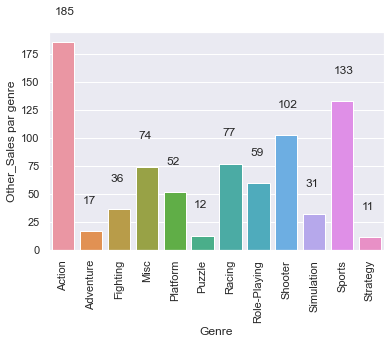

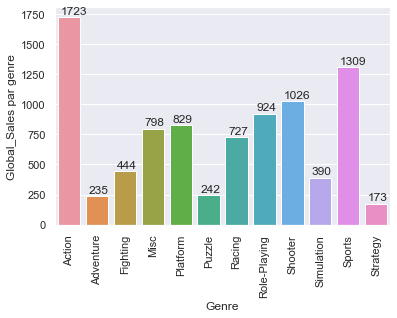

In [27]:
genreGraph("NA_Sales")
genreGraph("EU_Sales")
genreGraph("JP_Sales")
genreGraph("Other_Sales")
genreGraph("Global_Sales")

In [28]:
def genreYearGraph(genre):
    #Créer un graph de l'évolution du nombre de ventes en fonction du genre choisi
    
    copy = data.loc[data['Genre']== genre]
    copy = copy.groupby('Year')['Global_Sales'].agg('sum').reset_index()
    copy.sort_values(by='Year', ascending=False,  inplace = True)
    sns.barplot(data=copy, x="Year", y='Global_Sales').set(xlabel = 'Year', ylabel = 'Global_Sales', title=genre)
    plt.ylim(0, 150)
    plt.xticks(rotation=90)
    plt.show()

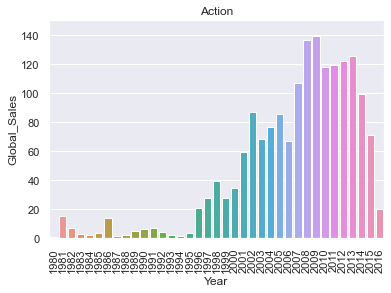

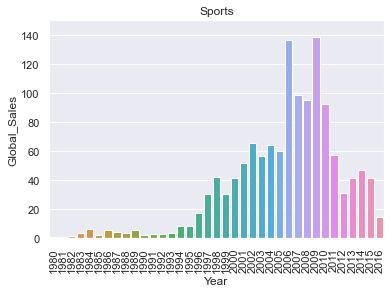

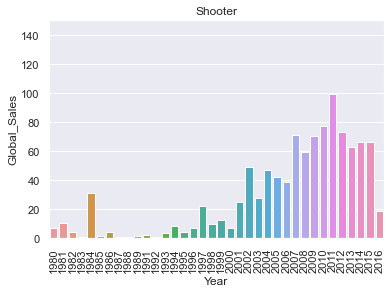

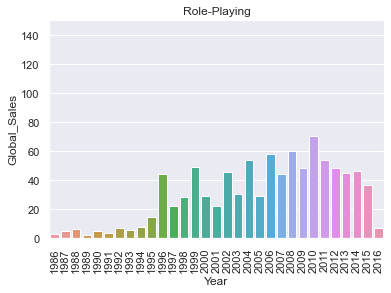

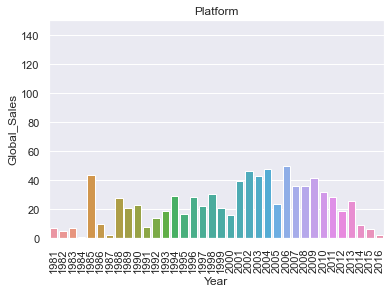

In [29]:
genreYearGraph('Action')
genreYearGraph('Sports')
genreYearGraph('Shooter')
genreYearGraph('Role-Playing')
genreYearGraph('Platform')

In [30]:
def publisherGraph (var):
    #Créer un graph avec le nombre de jeu vendu par les 10 plus grands Publisher par région
    copy = data
    copy = copy.groupby('Publisher')[var].agg('sum').reset_index()
    copy.sort_values(by=var, ascending=False,  inplace = True)
    copy = copy[:10]
    sns.barplot(data=copy, x="Publisher", y=var).set(xlabel = 'Publisher', ylabel = var+' (en million)' )
    sales = copy[var].tolist()
    for i in range(10):
        plt.text(i-0.3, sales[i]+25, round(sales[i]))
    plt.ylim(0, 1800)
    plt.xticks(rotation=90)
    plt.show()

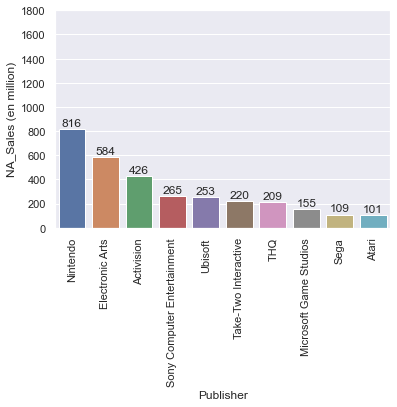

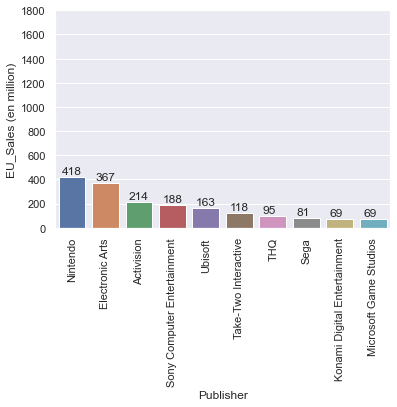

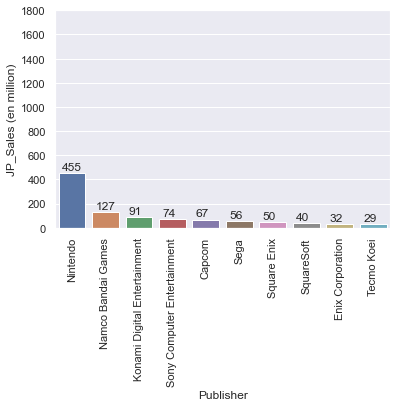

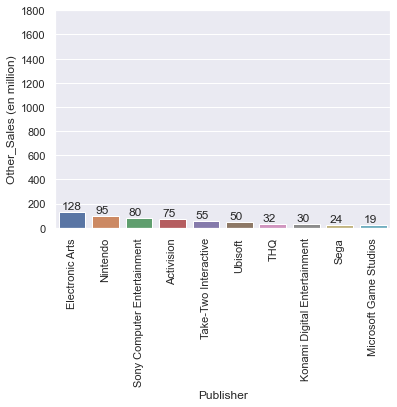

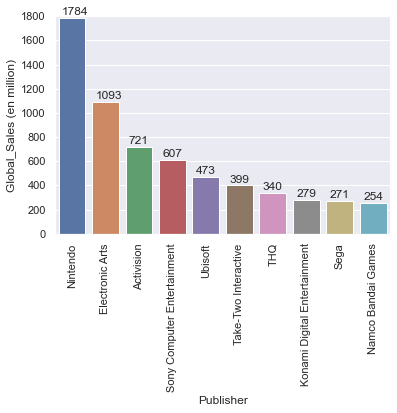

In [31]:
publisherGraph('NA_Sales')
publisherGraph('EU_Sales')
publisherGraph('JP_Sales')
publisherGraph('Other_Sales')
publisherGraph('Global_Sales')

,Year,Global_Sales
0,1980,11.38
1,1981,35.77
2,1982,28.86
3,1983,16.79
4,1984,50.36
5,1985,53.94
6,1986,37.07
7,1987,21.74
8,1988,47.22
9,1989,73.45


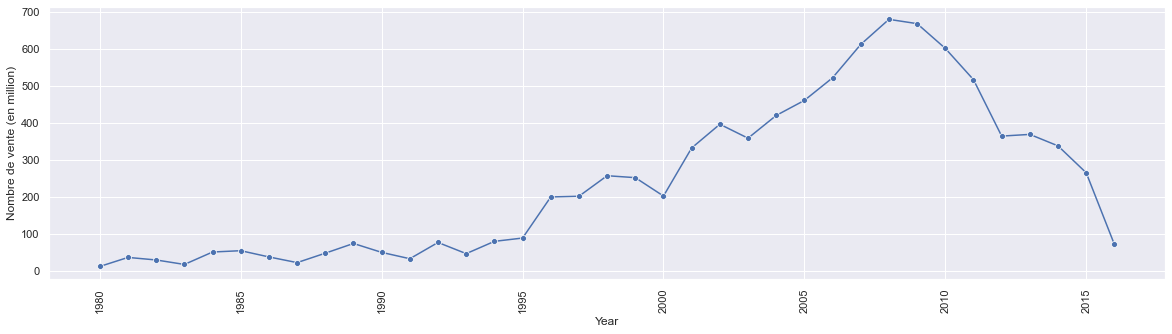

In [32]:


#Evolution du nombre de ventes dans le monde entier au cours des années

copy = data
copy = copy.groupby('Year')['Global_Sales'].agg('sum').reset_index()
copy.sort_values(by='Year', ascending=True,  inplace = True)
display(copy)

plt.figure(figsize=(20,5))
sns.lineplot(data=copy, x="Year", y='Global_Sales',marker="o").set(xlabel = 'Year', ylabel = 'Nombre de vente (en million)')
plt.xticks(rotation=90)
plt.show()

In [33]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

In [34]:
#Recherche de corelation entre le genre et le nombre de vente global
X = data["Genre"] # qualitative
Y = data["Global_Sales"] # quantitative

eta_squared(X,Y)

0.01215360374155762

In [35]:
#Recherche de corelation entre le publisher et le nombre de vente global
X = data["Publisher"] # qualitative
Y = data["Global_Sales"] # quantitative

eta_squared(X,Y)

0.11013807948714552

In [36]:
#Recherche de corelation entre l et le nombre de vente global
X = data["Year"] # qualitative
Y = data["Global_Sales"] # quantitative

eta_squared(X,Y)

0.025306105773394892

In [37]:
def regLinear(var1, var2):
    Y = data[var1]
    X = data[[var2]]
    X = X.copy() # On modifiera X, on en crée donc une copie
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
    a,b = result.params[var2],result.params['intercept']

    sns.scatterplot(data=data, x=var2, y=var1)
    plt.plot(data[var2],data[var1], "o")
    plt.plot(np.arange(80),[a*x+b for x in np.arange(80)])
    plt.xlabel(var2)
    plt.ylabel(var1)
    plt.show()
    print("a = ",a ,'  b =', b , '  R² =', (st.pearsonr(data[var2],data[var1])[0]))

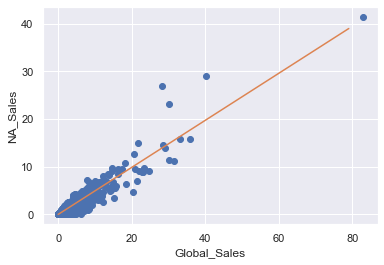

a =  0.4939145354275127   b = -0.001419841987464439   R² = 0.9412673002868234


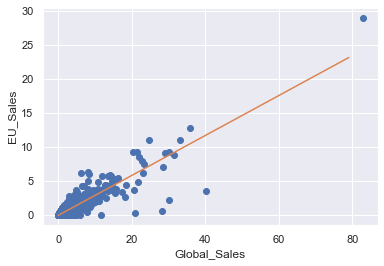

a =  0.29350679260680557   b = -0.011003846163565988   R² = 0.9032696175786115


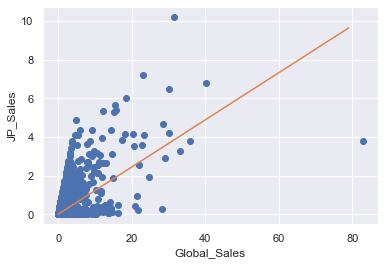

a =  0.12193646356519504   b = 0.012789802893200216   R² = 0.6127892888145365


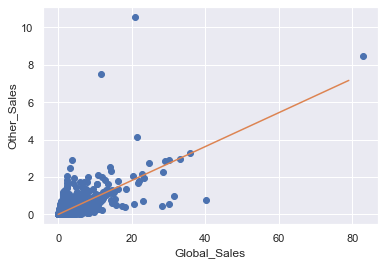

a =  0.09071112061179258   b = -0.0006790355950759875   R² = 0.7479703287077246


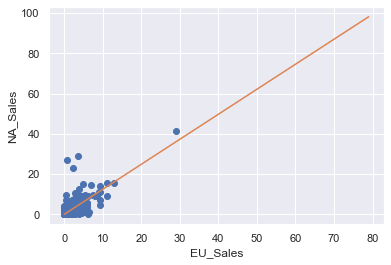

a =  1.2417306336385536   b = 0.08219579096297794   R² = 0.7689344410695113


In [38]:
regLinear('NA_Sales', 'Global_Sales')
regLinear('EU_Sales', 'Global_Sales')
regLinear('JP_Sales', 'Global_Sales')
regLinear('Other_Sales', 'Global_Sales')
regLinear('NA_Sales', 'EU_Sales')